In [1]:
import timeit
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt

import pyclesperanto_prototype as proto
import pyclesperanto as cle

cle.select_device()
cle.set_wait_for_kernel_to_finish(True)

proto.select_device()
proto.set_wait_for_kernel_finish(True)

sizes = np.arange(1, 500, 10)
warmup_iter = 1
eval_iter = 4

seed_value = 42

In [2]:
def mb_to_bytes(mb:int = 1) -> int:
    return mb * 1024 * 1024

def shape_from_elements(bytes:int) -> tuple:
    elements = bytes / 4
    shape = int(np.power(elements, 1/3))
    return (shape, shape, shape)

def generate_random_image(size:int = 128) -> np.ndarray:
    """
    Generates a random image of given size and sigma.
    """
    shape = shape_from_elements(mb_to_bytes(size))
    return np.random.rand(shape[0], shape[1], shape[2]).astype(np.float32)

def benchmark_function(target_function, operation:str, framework:str) -> pd.DataFrame:
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    np.random.seed(seed_value)
    benchmark_data = []
    for size in sizes:
        # make new data
        image = generate_random_image(size)
        size_mb = image.size * image.itemsize / 1024 / 1024
        # bind target function to given image
        partial_function = partial(target_function, image)
        # warmup       
        _ = timeit.timeit(partial_function, number=warmup_iter)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=eval_iter)
        
        print(f"Processing {image.shape} of {size_mb} Mb with {framework}... {time_in_s} s")

        # store results
        benchmark_data.append(pd.DataFrame({"benchmark": operation, "framework": framework, "size": size_mb, "time": time_in_s}, index=[0]))
    return pd.concat(benchmark_data)

## Push()

In [3]:
def pycle_function(image):
    cle.push(image)

def prototype_function(image):
    proto.push(image)

In [4]:
pycle_benchmark_push = benchmark_function(pycle_function, "push", "pyclesperanto")
prototype_benchmark_push = benchmark_function(prototype_function, "push", "prototype")

Processing (63, 63, 63) of 0.9538536071777344 Mb with pyclesperanto... 0.0013689259994862368 s
Processing (142, 142, 142) of 10.922576904296875 Mb with pyclesperanto... 0.00716911000017717 s
Processing (176, 176, 176) of 20.796875 Mb with pyclesperanto... 0.01312642999982927 s
Processing (201, 201, 201) of 30.97763442993164 Mb with pyclesperanto... 0.019308536000608 s
Processing (220, 220, 220) of 40.618896484375 Mb with pyclesperanto... 0.025258037001549383 s
Processing (237, 237, 237) of 50.78145217895508 Mb with pyclesperanto... 0.030804306999925757 s
Processing (251, 251, 251) of 60.3227653503418 Mb with pyclesperanto... 0.03703536900138715 s
Processing (265, 265, 265) of 70.99008560180664 Mb with pyclesperanto... 0.04295566700056952 s
Processing (276, 276, 276) of 80.202392578125 Mb with pyclesperanto... 0.047700499000711716 s
Processing (287, 287, 287) of 90.17907333374023 Mb with pyclesperanto... 0.054534587001398904 s
Processing (298, 298, 298) of 100.95059204101562 Mb with pyc

# Create()

In [5]:
def pycle_function(image):
    cle.create(image.shape)

def prototype_function(image):
    proto.create(image.shape)

In [6]:
pycle_benchmark_create = benchmark_function(pycle_function, "create", "pyclesperanto")
prototype_benchmark_create = benchmark_function(prototype_function, "create", "prototype")

Processing (63, 63, 63) of 0.9538536071777344 Mb with pyclesperanto... 1.8290000298293307e-05 s
Processing (142, 142, 142) of 10.922576904296875 Mb with pyclesperanto... 1.6598000001977198e-05 s
Processing (176, 176, 176) of 20.796875 Mb with pyclesperanto... 1.7567999748280272e-05 s
Processing (201, 201, 201) of 30.97763442993164 Mb with pyclesperanto... 1.5758001609356143e-05 s
Processing (220, 220, 220) of 40.618896484375 Mb with pyclesperanto... 1.7706999642541632e-05 s
Processing (237, 237, 237) of 50.78145217895508 Mb with pyclesperanto... 1.8135999198420905e-05 s
Processing (251, 251, 251) of 60.3227653503418 Mb with pyclesperanto... 1.7623999156057835e-05 s
Processing (265, 265, 265) of 70.99008560180664 Mb with pyclesperanto... 1.8213000657851808e-05 s
Processing (276, 276, 276) of 80.202392578125 Mb with pyclesperanto... 1.6415999198216014e-05 s
Processing (287, 287, 287) of 90.17907333374023 Mb with pyclesperanto... 1.958800021384377e-05 s
Processing (298, 298, 298) of 100.9

# Pull()

In [7]:
def pycle_function(image):
    h = cle.push(image)
    cle.pull(h)

def prototype_function(image):
    h = proto.push(image)
    proto.pull(h)

In [8]:
pycle_benchmark_pull = benchmark_function(pycle_function, "push_pull", "pyclesperanto")
prototype_benchmark_pull = benchmark_function(prototype_function, "push_pull", "prototype")
pycle_benchmark_pull["time"] = pycle_benchmark_pull["time"] - pycle_benchmark_push["time"]
prototype_benchmark_pull["time"] = prototype_benchmark_pull["time"] - prototype_benchmark_push["time"]

Processing (63, 63, 63) of 0.9538536071777344 Mb with pyclesperanto... 0.004448581999895396 s
Processing (142, 142, 142) of 10.922576904296875 Mb with pyclesperanto... 0.018842526000298676 s
Processing (176, 176, 176) of 20.796875 Mb with pyclesperanto... 0.0222195019996434 s
Processing (201, 201, 201) of 30.97763442993164 Mb with pyclesperanto... 0.05010845799915842 s
Processing (220, 220, 220) of 40.618896484375 Mb with pyclesperanto... 0.07329422300063015 s
Processing (237, 237, 237) of 50.78145217895508 Mb with pyclesperanto... 0.10779604999879666 s
Processing (251, 251, 251) of 60.3227653503418 Mb with pyclesperanto... 0.1260426329990878 s
Processing (265, 265, 265) of 70.99008560180664 Mb with pyclesperanto... 0.146327704000214 s
Processing (276, 276, 276) of 80.202392578125 Mb with pyclesperanto... 0.13380668200079526 s
Processing (287, 287, 287) of 90.17907333374023 Mb with pyclesperanto... 0.1855537400006142 s
Processing (298, 298, 298) of 100.95059204101562 Mb with pyclespera

## Results

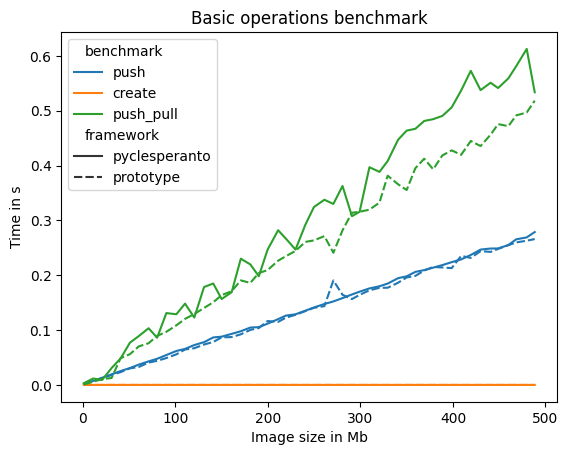

In [9]:
import seaborn as sns

bench = pd.concat([pycle_benchmark_push, prototype_benchmark_push, pycle_benchmark_create, prototype_benchmark_create, pycle_benchmark_pull, prototype_benchmark_pull])

# plot using seaborn the time vs size for each operation and framework on the same plot
# set the title to "Basic operations benchmark"
# set the x label to "Image size in Mb"
# set the y label to "Time in s"
sns.lineplot(x="size", y="time", hue="benchmark", style="framework", data=bench)
plt.title("Basic operations benchmark")
plt.xlabel("Image size in Mb")
plt.ylabel("Time in s")
plt.show()